In [3]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist #untuk load data set MNIST

In [47]:
imgTrain, labelsTrain = loadlocal_mnist(images_path='train-images.idx3-ubyte',
                                        labels_path='train-labels.idx1-ubyte') #label = nama gambar, untuk menyimpan data setMNIST ke variabel

In [46]:
imgTest, labelsTest = loadlocal_mnist(images_path='t10k-images.idx3-ubyte',
                                        labels_path='t10k-labels.idx1-ubyte') 
#test = untuk pengjuian data atau model yang telah di latih

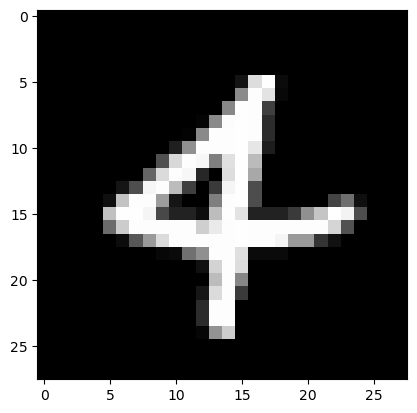

In [121]:
plt.imshow(imgTrain[150].reshape(28,28), cmap='gray') #untuk menguji apakah variabel dataset sudah bisa digunakan, reshape untuk ngeprint dataSet

In [94]:
hog_train_reshape = imgTrain.reshape(-1, 28, 28) #keseluruhan dataset di reshape lalu di masukkan dalam variabel baru
y_train = np.array(labelsTrain) 

In [89]:
#setiap gambar di hog kan yang ada di variabel hog_train_reshape dengan fungsi loop 
hog_train = []
for image in hog_train_reshape:
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_train.append(features)
hog_train = np.array(hog_train)#hasil hog disimpan ke hog_train

In [92]:
hog_test_reshape = imgTest.reshape(-1, 28, 28)
y_test = np.array(labelsTest)

In [93]:

hog_test = []
for image in hog_test_reshape:
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_test.append(features)

In [95]:
#proses training dataset yg sudah di hog kan menggunakan
clf = SVC()
clf.fit(hog_train, labelsTrain) #yang di trainitu hog train dan label train

SVC()

In [137]:
prediksi = clf.predict(hog_test) #hasi training disimpan ke dalam variabel prediksi karena data sudah ditrain maka diuji dengan hogtest

Text(0.5, 1.0, 'Original Image')

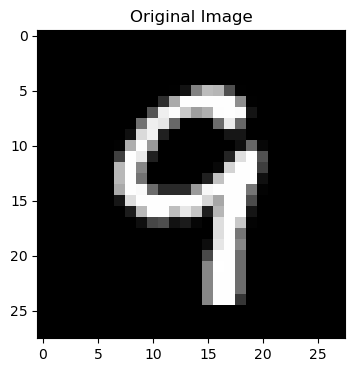

In [138]:
#bagian prediksi
#jadi disini mencoba print salah satu angka yang ada data set
fig, axes = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)


axes.imshow(imgTest[150].reshape(28,28), cmap=plt.cm.gray)
axes.set_title('Original Image')

In [139]:
#lalu codingan mencoba prediksi angka dari data set tersebut apakah berhasil atau tidak

clf.predict(hog_test[150].reshape(1, -1))
print(clf.predict(hog_test[150].reshape(1, -1)))

[9]


In [140]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [142]:
conf_mat = metrics.confusion_matrix(y_test, prediksi)
conf_mat

array([[ 973,    0,    1,    0,    0,    0,    5,    1,    0,    0],
       [   1, 1124,    6,    0,    2,    0,    1,    1,    0,    0],
       [   2,    0, 1011,    6,    2,    0,    1,    8,    2,    0],
       [   2,    2,    8,  979,    0,    2,    0,    4,    6,    7],
       [   4,    1,    0,    0,  950,    0,    9,    2,    2,   14],
       [   3,    0,    0,   10,    0,  865,    7,    1,    5,    1],
       [   6,    2,    1,    0,    2,    4,  940,    0,    2,    1],
       [   0,    3,   13,    3,   11,    0,    0,  981,    4,   13],
       [   6,    1,    4,   12,    2,    4,    1,    3,  934,    7],
       [   2,    3,    0,    5,   11,    4,    0,    4,   13,  967]],
      dtype=int64)

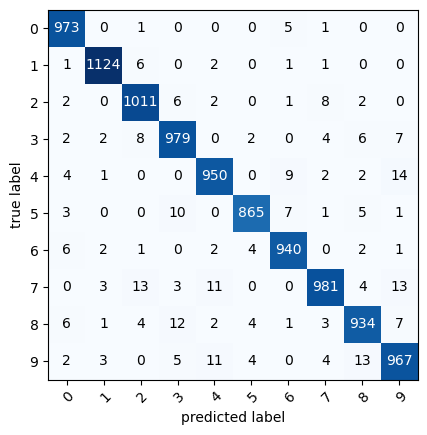

In [143]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [144]:
precision = metrics.precision_score(y_test, prediksi, average=None)
precision

array([0.97397397, 0.98943662, 0.9683908 , 0.96453202, 0.96938776,
       0.98407281, 0.97510373, 0.9761194 , 0.96487603, 0.95742574])

In [146]:
accuracy = metrics.accuracy_score(y_test, prediksi)
accuracy

0.9724